## Recognizing CIFAR-10 images with Deep Learning (Part I)

CIFAR-10 dataset contains 60,000 color images of size 32*32 pixels which are divided in 10 classes.
We will use Keras library to import the dataset which contains 50,000 images as training iamges
and 10,000 as test images

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
import matplotlib.pyplot as plt
% matplotlib inline

Using TensorFlow backend.


In [2]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 18s 0us/step


In [3]:
BATCH_SIZE = 128
nb_epochs = 20
VALIDATION_SPLIT = 0.2
num_classes = 10

In [4]:
num_train, img_channels, img_rows, img_cols = X_train.shape
num_test, _, _, _= X_test.shape

In [5]:
print('X_train Shape:', X_train.shape)
training_samples = X_train.shape[0]
print("Training samples:", training_samples)
print("Test Samples:", y_test.shape[0])

X_train Shape: (50000, 32, 32, 3)
Training samples: 50000
Test Samples: 10000


In [6]:
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

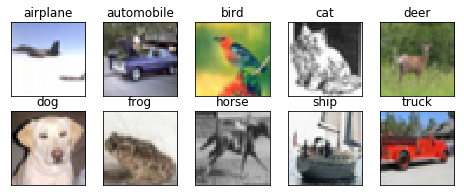

In [7]:
fig = plt.figure(figsize =(8, 3))
for i in range(num_classes):
    axis = fig.add_subplot(2, 5, 1+i, xticks = [], yticks = [])
    idx = np.where(y_train[:] == i)[0]
    features_idx = X_train[idx, ::]
    image_num = np.random.randint(features_idx.shape[0])
    image = features_idx[image_num,::]
    axis.set_title(class_names[i])
    plt.imshow(image)
plt.show()

One hot Encoding

In [8]:
# convert to categorical
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [9]:
#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
from keras import backend as K
if K.backend() == 'tensorflow':
    K.set_image_dim_ordering('tf')

Building sequential model

In [11]:
# Network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

In [12]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

Compiling the model

In [13]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

Training the model

In [14]:
model_history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = nb_epochs, 
          validation_split = VALIDATION_SPLIT, verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 30s 744us/step - loss: 1.7436 - acc: 0.3870 - val_loss: 1.4285 - val_acc: 0.5030
Epoch 2/20
40000/40000 [==============================] - 5s 136us/step - loss: 1.3724 - acc: 0.5136 - val_loss: 1.2388 - val_acc: 0.5726
Epoch 3/20
40000/40000 [==============================] - 5s 137us/step - loss: 1.2401 - acc: 0.5625 - val_loss: 1.2981 - val_acc: 0.5421
Epoch 4/20
40000/40000 [==============================] - 5s 136us/step - loss: 1.1557 - acc: 0.5938 - val_loss: 1.1023 - val_acc: 0.6181
Epoch 5/20
40000/40000 [==============================] - 5s 134us/step - loss: 1.0808 - acc: 0.6198 - val_loss: 1.0849 - val_acc: 0.6220
Epoch 6/20
40000/40000 [==============================] - 5s 135us/step - loss: 1.0220 - acc: 0.6436 - val_loss: 1.0930 - val_acc: 0.6225
Epoch 7/20
40000/40000 [==============================] - 5s 136us/step - loss: 0.9739 - acc: 0.6599 - val_loss: 1.0344 -

List all data in history

In [15]:
print(model_history.history.keys())

dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])


Summarize history for accuracy

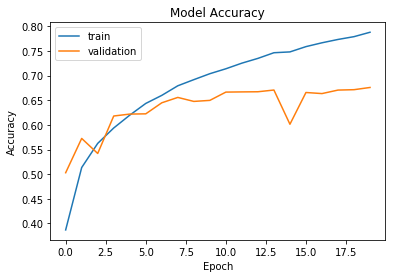

In [16]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

Summarize history for loss

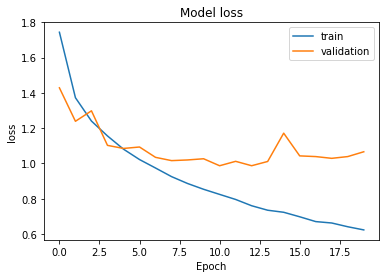

In [17]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()

In [18]:
score = model.evaluate(X_test, y_test, batch_size = BATCH_SIZE, verbose =1)

10000/10000 [==============================] - 1s 51us/step


In [19]:
print("Test Score", score[0])
print("Test accuracy", score[1])

Test Score 1.07640028095
Test accuracy 0.671
